# 0. Convolution and Impulse Response
Evan Varan, lze4

## 0.a Imports

In [206]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
plt.style.use('classic')

## 0.b Check Versions, etc

In [207]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


## 0.c Define some useful functions

In [208]:
def print_polezero(pp, zz):

    print('Zeroes:')
    for x in zz: print('\t{num.real:+0.04f} {num.imag:+0.04f}j'.format(num=x))
    
    print('Poles:') 
    for x in pp: print('\t{num.real:+0.04f} {num.imag:+0.04f}j'.format(num=x))

In [209]:
def print_numden(nn, dd):

    print('Numerator:')
    for x in nn: print('\t{num.real:+0.04f}'.format(num=x))
    
    print('Denominator:') 
    for x in dd: print('\t{num.real:+0.04f}'.format(num=x))

In [210]:
def plot_ImpulseResponse(numerator):
    
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Impulse Response (numerator)', fontsize=10)
    ax.set_axisbelow(True)
    ax.minorticks_on()

    ax.grid(which='major', linestyle='-',linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both', top='off', bottom='off', left='off', right='off')
        
    mm = 1.1 * max(numerator)
    mn = min(1.1 * min(numerator), -0.1)
    ax.set_ylim(mn, mm)
    ax.set_xlim(-1,len(numerator))

    ax.set_xlabel('impulse response (numerator, samples)')
    ax.set_ylabel('amplitude')
    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')

    time = np.arange(0,len(numerator))
    marker, stem, base = ax.stem(time, numerator)
    stem.set_linewidth(2)

    plt.show(block=False)
    
    return

In [211]:
def plot_PoleZero(zeroes, poles):
    
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Unit Circle (z-plane)', fontsize=10)
    ax.minorticks_on()

    ax.grid(which='major', linestyle='-',linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both',top='off', bottom='off', left='off', right='off')

    theta = np.linspace(-np.pi,np.pi,201)
    ax.plot(np.cos(theta), np.sin(theta), color='gray')

    ax.scatter(np.real(zeroes), np.imag(zeroes),facecolors='none', edgecolors='blue',marker='o')
    ax.scatter(np.real(poles), np.imag(poles), facecolors='red', marker='x')

    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')

    ax.set_ylabel('Im{z}')
    ax.set_xlabel('Re{z}')
    ax.set_aspect('equal')

    plt.show(block=False)

    return

In [212]:
def plot_FreqResponse(zeroes, poles, srate):

    # The Python SciPy library function "freq_zpk" evaluates the set of (pole,zero) values via the DTFT
    ww, hh = signal.freqz_zpk(zeroes, poles, 1, 512, False, srate)
    
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Frequency Response (DTFT)', fontsize=10)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both', top='off', bottom='off', left='off', right='off')
    
    ax.plot(ww,20*np.log10(abs(hh)),'b')
    
    ax.set_ylabel('Amplitude (dB)', color='b')
    ax.set_xlabel('Frequency (Hz)')
    
    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')
    
    ax2 = ax.twinx()
    angles = np.unwrap(np.angle(hh))
    ax2.plot(ww,angles,'g')
    ax2.set_ylabel('Angle (rad)', color='g')

    plt.axis('tight')
    plt.show(block=False)

    return

In [213]:
def plot_Convolution(sig, filt):

    # The SciPy signal library "convolve" function performs a direct convolution
    conv = sp.signal.convolve(sig,filt,'full','direct')
    
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Convolution Result', fontsize=10)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both', top='off', bottom='off', left='off', right='off')
    
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Samples [n]')
    
    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')
    
    time = np.arange(0,len(conv))
    marker, stem, base = ax.stem(time, conv)
    stem.set_linewidth(2)
    
    mm = 1.1 * max(conv)
    mn = 1.1 * min(min(conv),-0.1)
    ax.set_ylim(mn, mm)
    ax.set_xlim(-1, len(conv))
    
    annot = 'Length = {}'.format(len(conv))
    ax.annotate(annot, (0.05,0.95), xycoords='axes fraction')

    plt.show(block=False)

    return

# 1. Read files of pole/zero pairs

In [214]:
zfile = 'simple.zeroes'
zeroes = np.loadtxt(zfile, comments='#', delimiter=',', dtype=complex, unpack=False)

pfile = 'none.poles'
poles = np.loadtxt(pfile, comments='#', delimiter=',', dtype=complex, unpack=False)
poles = [poles]

In [215]:
numerator, denominator = signal.zpk2tf(zeroes, poles, 1)

In [216]:
print_polezero(poles, zeroes)

Zeroes:
	-0.9000 +0.1000j
	-0.9000 -0.1000j
Poles:
	+0.0000 +0.0000j


In [217]:
print_numden(numerator, denominator)

Numerator:
	+1.0000
	+1.8000
	+0.8200
Denominator:
	+1.0000
	+0.0000


# 2. Make useful plots of the files
This is exactly as we've done before.  

Note the differences between the "_plot_ImpulseResponse_" function here and the "_plot_Convolution_" function used subsequently.

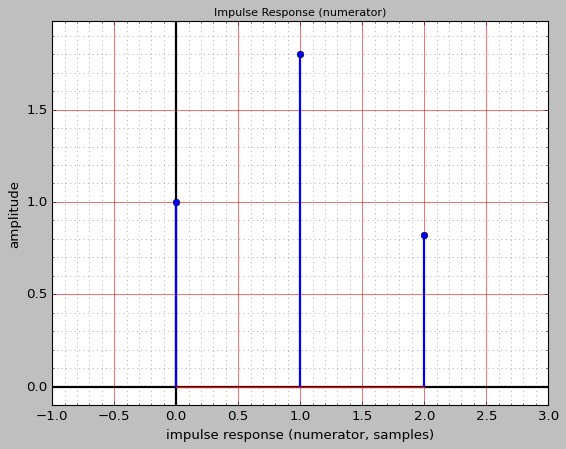

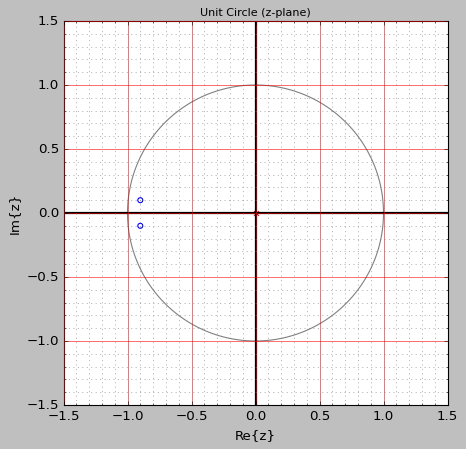

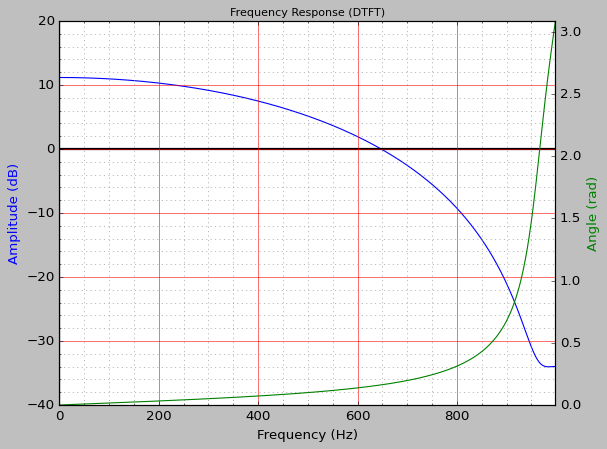

In [218]:
plot_ImpulseResponse(numerator)
plot_PoleZero(zeroes, poles)
plot_FreqResponse(zeroes, poles, 2000)

# 3. Impulse Response
Here, we're constructing an approximation of an "impulse function" by setting a single value of the input signal to unity, e.g. signal={... 0,0,0,1,0,0,0 ...} or signal=\[1\]

Note that you can include the additional zeroes surrounding the single "one" value and the length of the convolved sequence will grow as a result, though it will be filled with zeroes.  It may be useful for you to try this and see what happens.

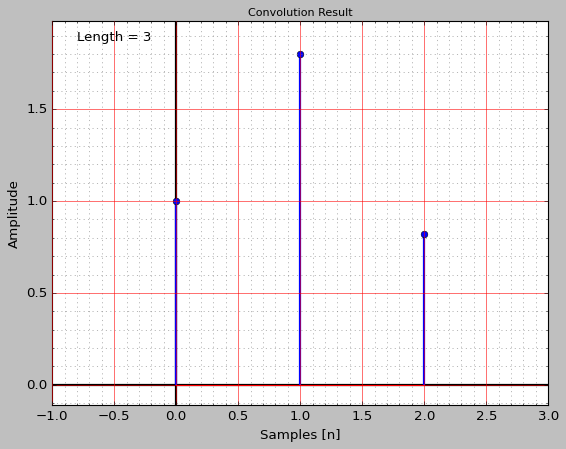

In [219]:
signal = [1]
plot_Convolution(signal,numerator)

# 4. Convolution
In class, we discussed the "convolution" operation ("$\ast$") in terms of the Z-transform and a transfer function, like this:

$$y[n] = h[n] \ast x[n] = \sum_{k}h[k]x[n-k]$$
Where
$$H(z) = \sum_{k}h[k]z^{-k} = Z\left\{h[k]\right\}$$
So that
$$Y(z) = H(z)X(z)$$

Here, the example uses the same signal and filter values as the included "_simple-convolution_" spreadsheet.  Play around with these values in both spreadsheet and Jupyter Notebook to see that they work the same way.

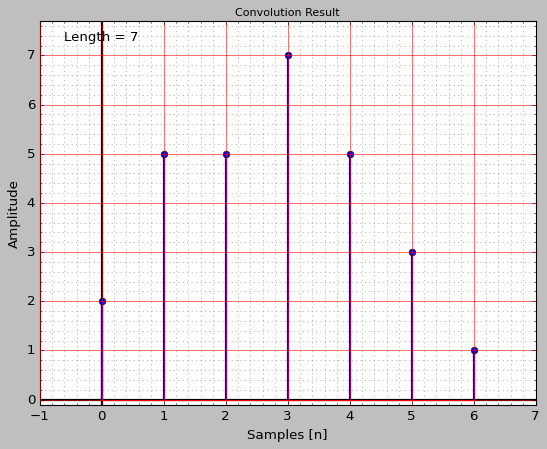

In [220]:
signal = [1,2,1,2,1]
filt = [2,1,1]

plot_Convolution(signal,filt)

# Questions

### 1. Convolution
* Create a simple "filter" (3-5 samples long) and a "signal" (8-10 samples long) and convolve them together
    * Use the spreadsheet approach as well as the Python approach to show that your result is correct
    * Why is the resulting convolved output __longer__ (number of samples) than the original signal?
    * How are the length of the "filter" and "signal" related to the length of the convolved output?
* Plot all of these results appropriately

### 2. Spectrum
* What is your "filter" doing to the spectrum of your "signal"?
    * What type of spectral response does your "filter" have?  (lowpass, highpass, etc.)
    * Use the "_plot_FrequencyResponse_" function to determine it
* Plot all of these results appropriately

### 3. Impulse Response, etc.
* Find the impulse response of your "filter"
    * What is the length of the impulse response? (how many samples)
    * Calculate this by-hand as well as by-Python
* Convolve your filter with the "unit step" sequence (basically a very long impulse)
    * What happens to the output?
* Plot all of these results appropriately

### 4. Design a Filter
* Design a simple lowpass filter with the following constraints:
    * Sampling rate: 3000 Hz
    * Passband: 0-600Hz with < 3 dB ripple
    * Stopband: 900-3000 Hz with > 40 dB suppression
* Use the website mentioned in class (http://t-filter.engineerjs.com/) to get the coefficients
    * Use the "Finite Impulse Response" (FIR) design page
    * Use the resulting coefficients in the numerator of your filter (polynomial coefficients) 
* Plot all of these results appropriately
    * Plot the impulse response of the filter two ways on the same axes:  
        * By plotting the numerator coefficients, and 
        * By convolving the filter with an impulse function
    * Compare your filter with the one provided ("LPF_1-of-10.numerator")

# 5. Simple Filter and Signal 

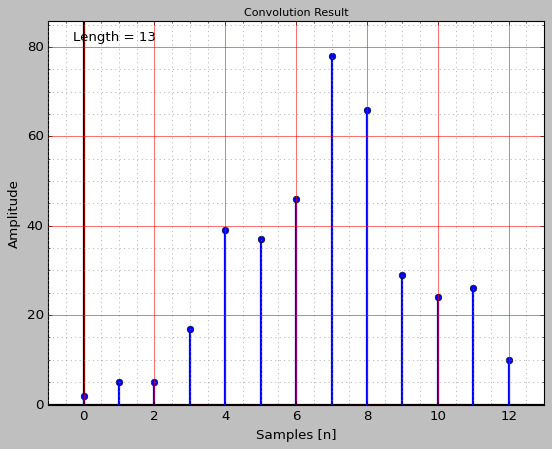

In [221]:
signal = [1,2,1,3,5]
filt = [2,1,1,8,9,3,2,4,2]
plot_Convolution(signal,filt)

# 5.a Questions:

* Why is the resulting convolved output longer (number of samples) than the original signal?
This is due to the standard process of convolution. The length of the resultant signal will usually be calculated by
length of signal + length of filter - 1.
* How are the length of the “filter” and “signal” related to the length of the convolved output?
length of signal + length of filter - 1.

# 6. Spectrum

Questions:
* What is your "filter" doing to the spectrum of your "signal"?
The frequency response of the filter will determine how the signal is affected. For example, a lower number in the filter relative to the signal
will indicated a band-pass filter. This filter doesnt really have a set pattern or label to it.
* What type of spectral response does your "filter" have? 
There is not a specific shape or curve to the filter when graphed.


# 7. Impulse Response

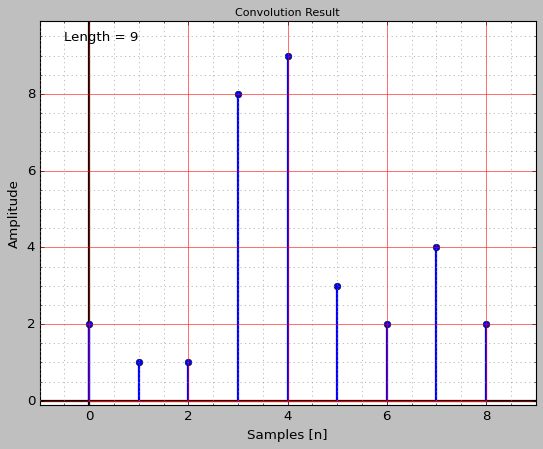

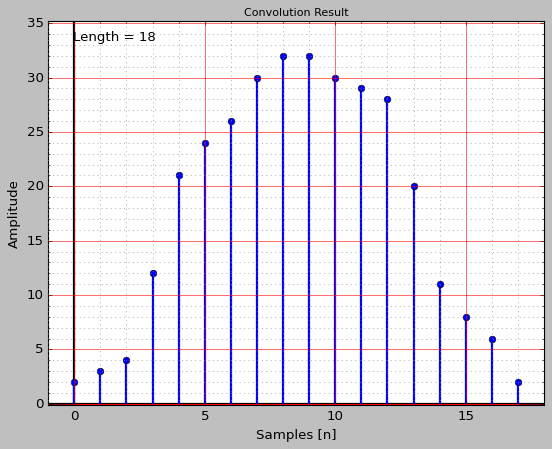

In [222]:
#Impulse
sig= [1]
plot_Convolution(sig,filt)

#Convolved with Unit Step
sig = [1,1,1,1,1,1,1,1,1,1]
plot_Convolution(sig,filt)

# 7.a Questions

* What is the length of the impulse response? (how many samples)
The length of the Impulse Response is 9 samples.
* Convolve your filter with the "unit step" sequence (basically a very long impulse) What happens to the output?
The Length of the filter is now 18 samples. the filter also follows more of a trend and we can see the rise and fall clearer.


# 8. Design a Filter

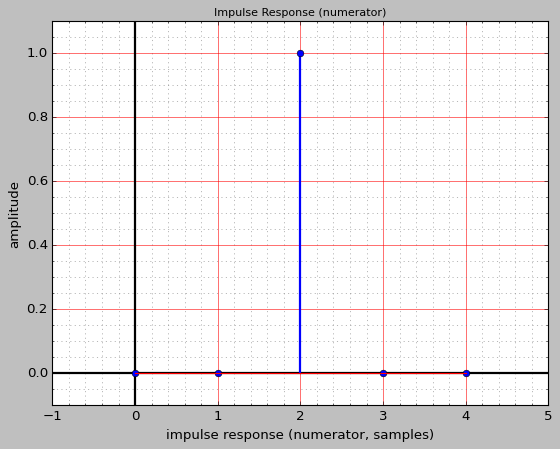

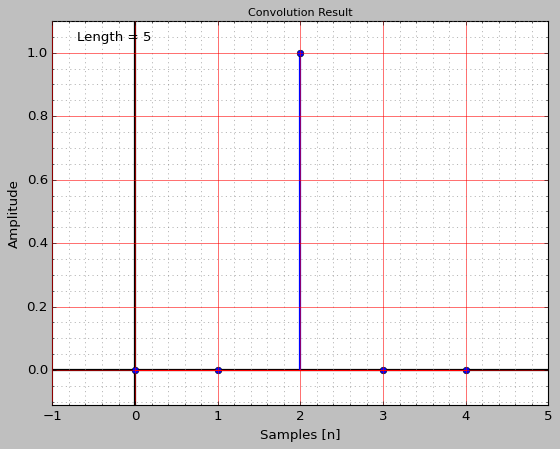

In [223]:
#Plotting impulse of designed filter
filternumerator = 'filter_designed'
numerator = np.loadtxt(filternumerator, comments='#', delimiter=',', dtype=float, unpack=False)
plot_ImpulseResponse(numerator)

#Plotting Filter convolved with an impulse
signal = [1]
plot_Convolution(signal,numerator)

# 8.a Comparing with LPF File

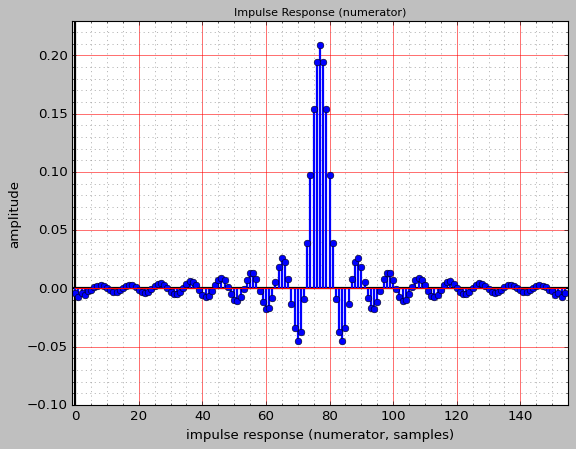

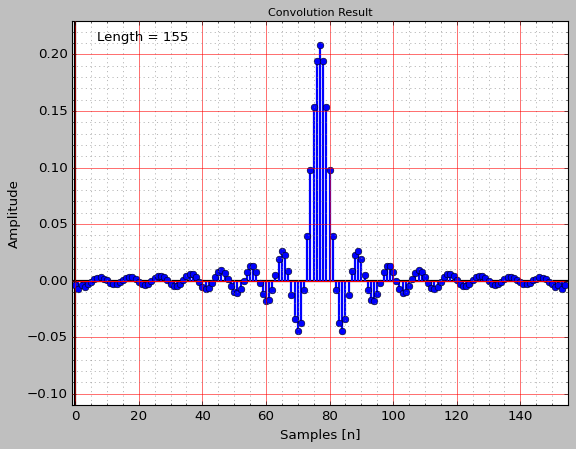

In [224]:
#Plotting impulse of LPF filter
LPF = 'LPF-1_of_10.numerator'
numerator = np.loadtxt(LPF, comments='#', delimiter=',', dtype=float, unpack=False)
plot_ImpulseResponse(numerator)

#Plotting LPF convolved with an impulse
signal = [1]
plot_Convolution(signal,numerator)